<a href="https://colab.research.google.com/github/veronikahill/MentalHealthInTech/blob/main/FinalProject_techMH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Pitt/MachineLearning/mentalhealthsurvey.csv')




Mounted at /content/drive


# **Cleaning and Preprocessing**

In [ ]:


#remove columns with over 18% missing data
total_rows = df.shape[0]


for column in df.columns:
  na_sums = df[column].isna().sum()
  na_percent = (na_sums * 100)/total_rows
  if na_percent > 18:
   print(f"{na_percent} % of the {column} column is missing, so the column will be removed.")
   df.drop(f"{column}", axis=1, inplace=True)




20.02791346824843 % of the How many employees does your company or organization have? column is missing, so the column will be removed.
20.02791346824843 % of the Is your employer primarily a tech company/organization? column is missing, so the column will be removed.
81.64689462665736 % of the Is your primary role within your company related to tech/IT? column is missing, so the column will be removed.
20.02791346824843 % of the Does your employer provide mental health benefits as part of healthcare coverage? column is missing, so the column will be removed.
29.30914166085136 % of the Do you know the options for mental health care available under your employer-provided coverage? column is missing, so the column will be removed.
20.02791346824843 % of the Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)? column is missing, so the column will be removed.
20.02791346824843 % of the Does your employer off

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 32 columns):
 #   Column                                                                                                                                        Non-Null Count  Dtype 
---  ------                                                                                                                                        --------------  ----- 
 0   Are you self-employed?                                                                                                                        1433 non-null   int64 
 1   Do you have previous employers?                                                                                                               1433 non-null   int64 
 2   Have your previous employers provided mental health benefits?                                                                                 1264 non-null   object
 3   Were you aware of the options for ment

In [ ]:
#dropping rows if the 'outcome' variable is missing

df.dropna(subset=['Do you currently have a mental health disorder?'], inplace=True)

In [ ]:
#looping through each row to get the % of missing data for each record and dropping the row if 18% or more is missing

total_cols = len(df.columns)

drop_rows=[]

for index, row in df.iterrows():
  missing_values = row.isnull().sum()
  percent_missing = (missing_values * 100) / total_cols
  if percent_missing > 18:
    print(f"\n Row with index {index} is missing {percent_missing} % of data and will be dropped.")
    drop_rows.append(index)


 Row with index 18 is missing 34.375 % of data and will be dropped.

 Row with index 25 is missing 34.375 % of data and will be dropped.

 Row with index 30 is missing 34.375 % of data and will be dropped.

 Row with index 32 is missing 34.375 % of data and will be dropped.

 Row with index 56 is missing 34.375 % of data and will be dropped.

 Row with index 71 is missing 34.375 % of data and will be dropped.

 Row with index 76 is missing 34.375 % of data and will be dropped.

 Row with index 83 is missing 34.375 % of data and will be dropped.

 Row with index 89 is missing 34.375 % of data and will be dropped.

 Row with index 101 is missing 34.375 % of data and will be dropped.

 Row with index 104 is missing 34.375 % of data and will be dropped.

 Row with index 108 is missing 34.375 % of data and will be dropped.

 Row with index 112 is missing 34.375 % of data and will be dropped.

 Row with index 113 is missing 34.375 % of data and will be dropped.

 Row with index 143 is missi

In [ ]:
df.drop(drop_rows, inplace=True)

In [ ]:
print(df.shape)
df.info()

(1264, 32)
<class 'pandas.core.frame.DataFrame'>
Index: 1264 entries, 0 to 1431
Data columns (total 32 columns):
 #   Column                                                                                                                                        Non-Null Count  Dtype 
---  ------                                                                                                                                        --------------  ----- 
 0   Are you self-employed?                                                                                                                        1264 non-null   int64 
 1   Do you have previous employers?                                                                                                               1264 non-null   int64 
 2   Have your previous employers provided mental health benefits?                                                                                 1264 non-null   object
 3   Were you aware of the options fo

In [ ]:


#Rename columns
df.rename(columns={
    "Are you self-employed?": "SelfEmployed",
    "Do you have previous employers?": "PreviousEmployers",
    "Have your previous employers provided mental health benefits?": "PrevEmployersMHBenefits",
    "Were you aware of the options for mental health care provided by your previous employers?": "AwarePrevMHCareOptions",
    "Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?": "PrevEmployersDiscussMH",
    "Did your previous employers provide resources to learn more about mental health issues and how to seek help?": "PrevEmployersMHResources",
    "Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?": "AnonymityProtected",
    "Do you think that discussing a mental health disorder with previous employers would have negative consequences?": "MHDiscussNegConsequences",
    "Do you think that discussing a physical health issue with previous employers would have negative consequences?": "PHDiscussNegConsequences",
    "Would you have been willing to discuss a mental health issue with your previous co-workers?": "WillingToDiscussMHCoworkers",
    "Would you have been willing to discuss a mental health issue with your direct supervisor(s)?": "WillingToDiscussMHSupervisor",
    "Did you feel that your previous employers took mental health as seriously as physical health?": "PrevEmployersMHTakenSeriously",
    "Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?": "ObservedNegConsequencesMH",
    "Would you be willing to bring up a physical health issue with a potential employer in an interview?": "WillingDiscussPHInterview",
    "Would you bring up a mental health issue with a potential employer in an interview?": "WillingDiscussMHInterview",
    "Do you feel that being identified as a person with a mental health issue would hurt your career?": "MHCareerImpact",
    "Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?": "CoworkersViewNegativelyMH",
    "How willing would you be to share with friends and family that you have a mental illness?": "WillingShareMHFamilyFriends",
    "Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?": "ObservedBadResponseMH",
    "Do you have a family history of mental illness?": "FamilyHistoryMH",
    "Have you had a mental health disorder in the past?": "PastMHDisorder",
    "Do you currently have a mental health disorder?": "CurrentMHDisorder",
    "Have you been diagnosed with a mental health condition by a medical professional?": "DiagnosedMHCondition",
    "Have you ever sought treatment for a mental health issue from a mental health professional?": "SoughtTreatmentMH",
    "If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?": "MHTreatmentEffectiveWorkInterference",
    "If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?": "MHNoTreatmentWorkInterference",
    "What is your age?": "Age",
    "What is your gender?": "Gender",
    "What country do you live in?": "CountryLive",
    "What country do you work in?": "CountryWork",
    "Which of the following best describes your work position?": "WorkPosition",
    "Do you work remotely?": "RemoteWork"
}, inplace=True)


ageDF = df[["Age", "CurrentMHDisorder"]]
df_cont = df["Age"]
outcome = df["CurrentMHDisorder"]
df_cat = df.drop(columns=["Age"])




#mode for categorical

#array(['Male', 'male', 'Male ', 'Female', 'M', 'female', 'm',
       'I identify as female.', 'Bigender', 'Female assigned at birth ',
       'F', 'Woman', 'man', 'fm', 'f', 'Cis female ', 'Transitioned, M2F',
       'Genderfluid (born female)', 'Other/Transfeminine',
       'Female or Multi-Gender Femme', 'Female ', 'woman', 'female/woman',
       'Cis male', 'Male.', 'Androgynous', 'male 9:1 female, roughly',
       nan, 'Male (cis)', 'Other', 'nb masculine', 'Cisgender Female',
       'Man', 'Sex is male', 'none of your business', 'genderqueer',
       'cis male', 'Human', 'Genderfluid', 'Enby', 'Malr', 'mtf', 'Queer',
       'Agender',
       "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
       'mail', 'female ', 'M|', 'non-binary', 'Male/genderqueer', 'fem',
       'Nonbinary', 'male ',
       'Female (props for making this a freeform field, though)',
       ' Female', 'Unicorn', 'Cis Male', 'Cis-woman', 'Genderqueer',
       'cisdude', 'Genderflux demi-girl', 'cis man', 'AFAB',
       'Transgender woman'], dtype=object)

In [ ]:
df_cat.info()
df_cont.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1264 entries, 0 to 1431
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   SelfEmployed                          1264 non-null   int64 
 1   PreviousEmployers                     1264 non-null   int64 
 2   PrevEmployersMHBenefits               1264 non-null   object
 3   AwarePrevMHCareOptions                1264 non-null   object
 4   PrevEmployersDiscussMH                1264 non-null   object
 5   PrevEmployersMHResources              1264 non-null   object
 6   AnonymityProtected                    1264 non-null   object
 7   MHDiscussNegConsequences              1264 non-null   object
 8   PHDiscussNegConsequences              1264 non-null   object
 9   WillingToDiscussMHCoworkers           1264 non-null   object
 10  WillingToDiscussMHSupervisor          1264 non-null   object
 11  PrevEmployersMHTakenSeriously      

In [ ]:
#normalizing gender
#male ; female ; other
import re

def map_gender(gender):
  if pd.isnull(gender):
    return "Other"
  gender = gender.lower().strip()
  if re.search(r'\b(male|man|m|cis male)\b', gender):
    return "Male"
  if re.search(r'\b(female|woman|f|cis female)\b', gender):
    return "Female"
  return "Other"


df_cat["Gender"] = df_cat["Gender"].apply(map_gender)

df_cat["Gender"].value_counts()


,count
Gender,
Male,925
Female,308
Other,31


In [ ]:
#handle missing values
response_mode = df['ObservedBadResponseMH'].mode()[0]
df_cat['ObservedBadResponseMH'].fillna(response_mode, inplace=True)


gender_mode = df['Gender'].mode()[0]
df_cat['Gender'].fillna(gender_mode, inplace=True)

print(df_cat.isnull().sum())
df_cat.isna().sum()



SelfEmployed                            0
PreviousEmployers                       0
PrevEmployersMHBenefits                 0
AwarePrevMHCareOptions                  0
PrevEmployersDiscussMH                  0
PrevEmployersMHResources                0
AnonymityProtected                      0
MHDiscussNegConsequences                0
PHDiscussNegConsequences                0
WillingToDiscussMHCoworkers             0
WillingToDiscussMHSupervisor            0
PrevEmployersMHTakenSeriously           0
ObservedNegConsequencesMH               0
WillingDiscussPHInterview               0
WillingDiscussMHInterview               0
MHCareerImpact                          0
CoworkersViewNegativelyMH               0
WillingShareMHFamilyFriends             0
ObservedBadResponseMH                   0
FamilyHistoryMH                         0
PastMHDisorder                          0
CurrentMHDisorder                       0
DiagnosedMHCondition                    0
SoughtTreatmentMH                 

<ipython-input-11-cc3d796190b2>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cat['ObservedBadResponseMH'].fillna(response_mode, inplace=True)
<ipython-input-11-cc3d796190b2>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

,0
SelfEmployed,0
PreviousEmployers,0
PrevEmployersMHBenefits,0
AwarePrevMHCareOptions,0
PrevEmployersDiscussMH,0
PrevEmployersMHResources,0
AnonymityProtected,0
MHDiscussNegConsequences,0
PHDiscussNegConsequences,0
WillingToDiscussMHCoworkers,0


In [ ]:
#combined dataframe
df_concat = pd.concat([df_cat, df_cont], axis=1)


# Exploratory Data Analysis

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
np.seterr(divide='ignore', invalid='ignore')



{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

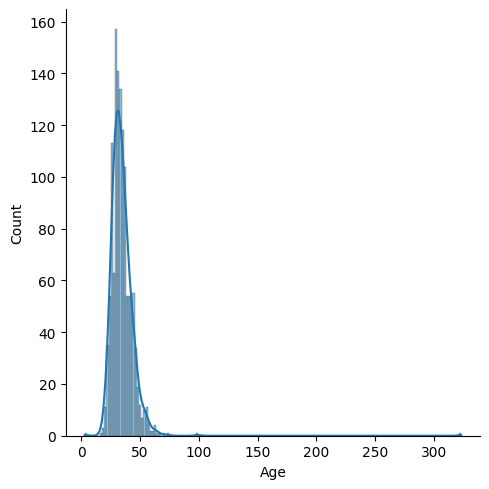

In [ ]:
# Plot the histogram thanks to the displot function
sns.displot( data=df_concat["Age"], kde=True )

<Axes: xlabel='Gender', ylabel='Age'>

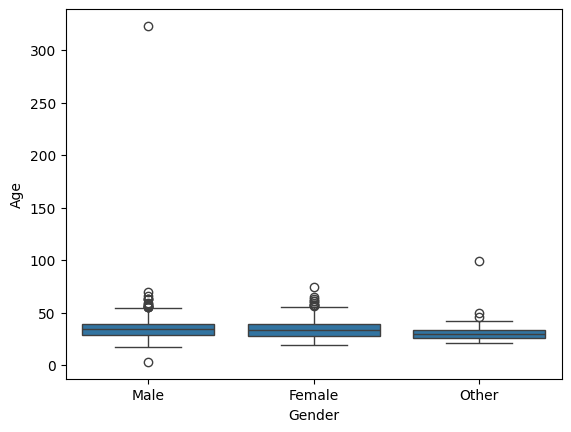

In [ ]:
#boxplot plot to show outliers

sns.boxplot( x=df_concat["Gender"], y=df_concat["Age"] )

In [ ]:
#only removing rows if the age is below 17 and above 100
df2 = df_concat[(df_concat['Age'] >= 17) & (df_concat['Age'] <= 100)]

df2.shape

df2_age = df2["Age"]
df2_cat = df2.drop("Age", axis=1)
df2_target = df2["CurrentMHDisorder"]

print("Min: ",df2_age.min()," Max: ", df2_age.max())

#1262 rows
#32 columns

Min:  17  Max:  99


<Axes: xlabel='Gender', ylabel='count'>

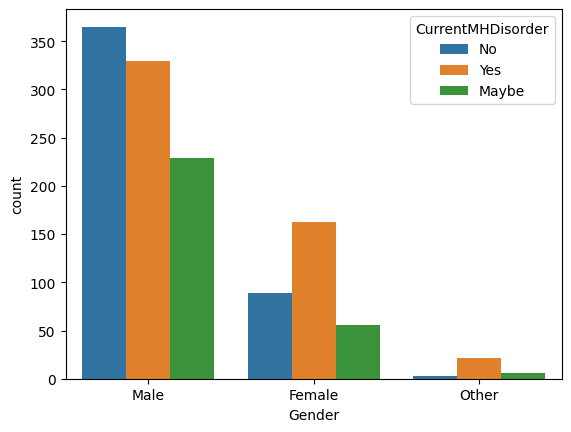

In [ ]:
#countplot of how much of each gender currently has a mental health disorder
sns.countplot(x='Gender', hue='CurrentMHDisorder', data=df2)

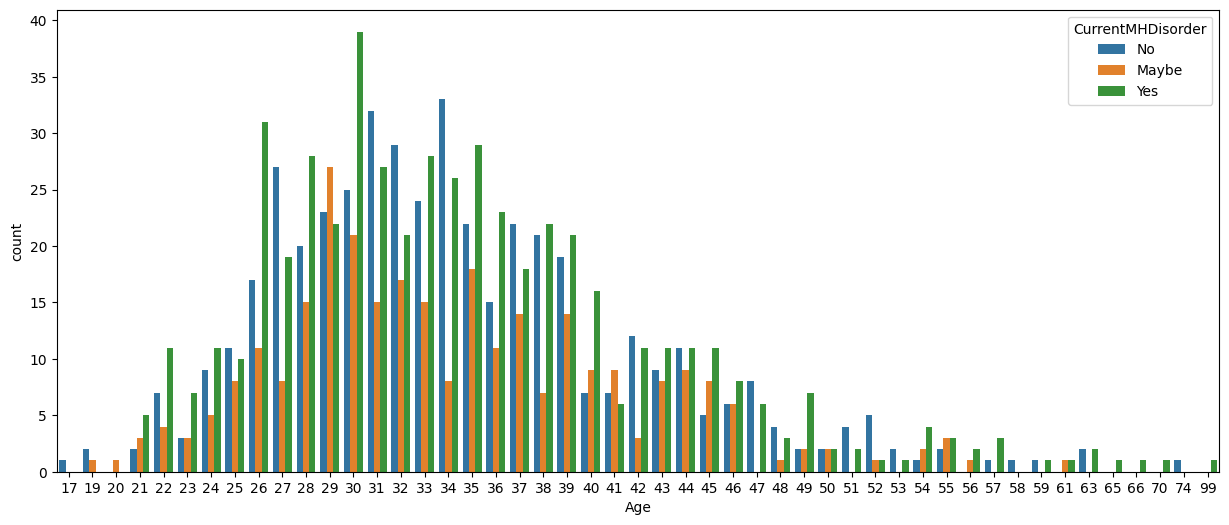

In [ ]:
#plot of Age and currentMHDisorder status - with outliers


plt.figure(figsize=(15, 6))

sns.countplot(x='Age', hue='CurrentMHDisorder', data=df2)

plt.show()

<Axes: xlabel='Gender', ylabel='Age'>

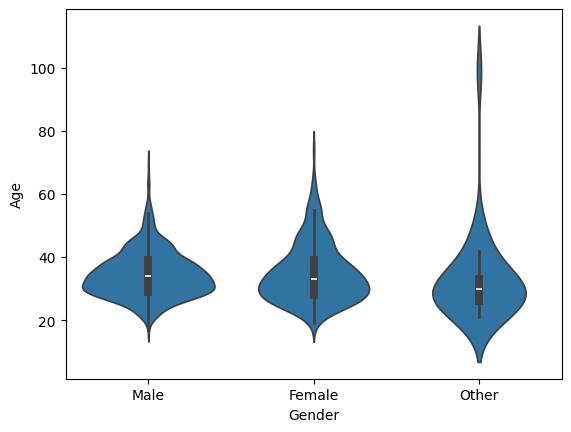

In [ ]:
#violin plot - with outliers

sns.violinplot( x=df2["Gender"], y=df2["Age"], data=df2 )

In [ ]:
female_remote = df2[df2["Gender"] == "Female"][["Gender", "RemoteWork", "CurrentMHDisorder"]]
male_remote = df2[df2["Gender"] == "Male"][["Gender", "RemoteWork", "CurrentMHDisorder"]]
other_remote = df2[df2_cat["Gender"] == "Other"][["Gender", "RemoteWork", "CurrentMHDisorder"]]

female_remote.value_counts()
male_remote.value_counts()



Gender  RemoteWork  CurrentMHDisorder
Male    Sometimes   No                   202
                    Yes                  177
                    Maybe                113
        Always      No                    89
                    Yes                   78
        Never       No                    74
                    Yes                   74
        Always      Maybe                 60
        Never       Maybe                 56
Name: count, dtype: int64

<Figure size 2500x1000 with 0 Axes>

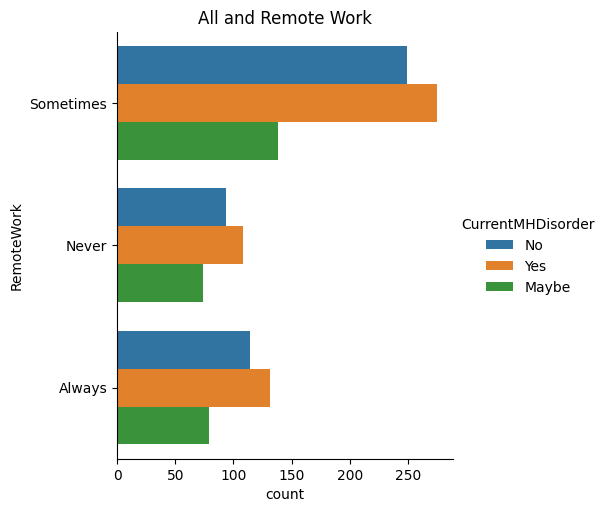

In [ ]:
plt.figure(figsize=(25, 10))
sns.catplot(data=df2, y="RemoteWork", hue="CurrentMHDisorder", kind="count")
plt.title("All and Remote Work")
plt.show()

<Figure size 2500x1000 with 0 Axes>

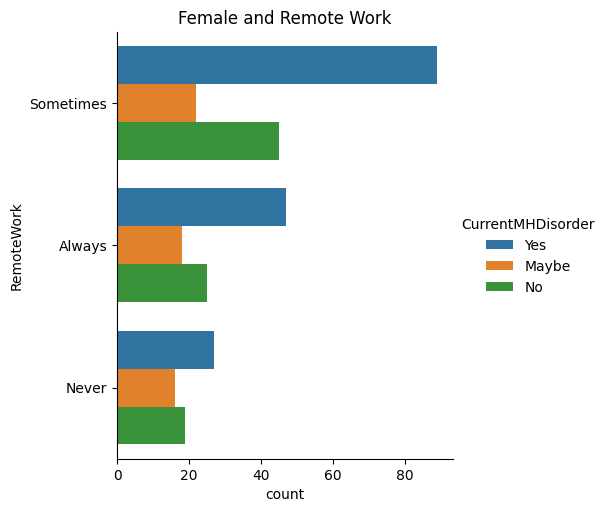

In [ ]:
#plot of target with females and their remote work situation

plt.figure(figsize=(25, 10))
sns.catplot(data=female_remote, y="RemoteWork", hue="CurrentMHDisorder", kind="count")
plt.title("Female and Remote Work")
plt.show()

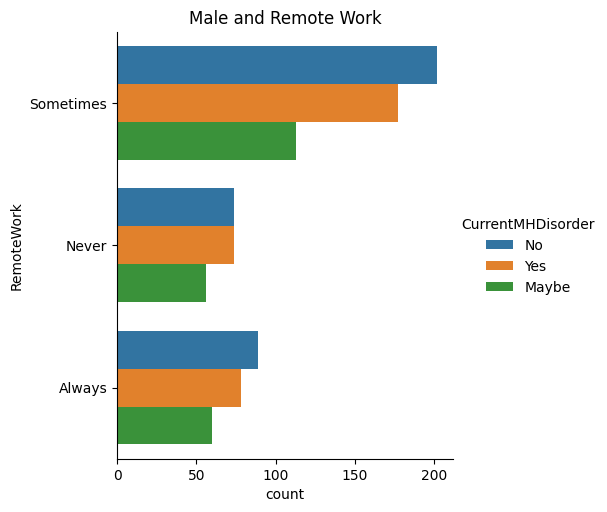

In [ ]:
#plot of target with males and their remote work situation
sns.catplot(data=male_remote, y="RemoteWork", hue="CurrentMHDisorder", kind="count")
plt.title("Male and Remote Work")
plt.show()


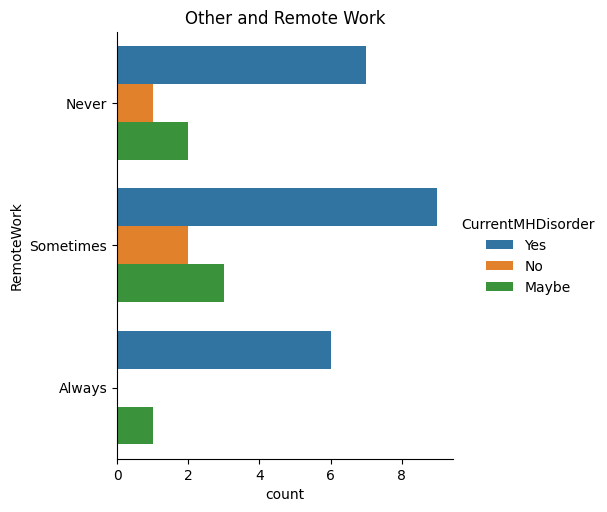

In [ ]:
sns.catplot(data=other_remote, y="RemoteWork", hue="CurrentMHDisorder", kind="count")
plt.title("Other and Remote Work")
plt.show()

# Feature Engineering

In [ ]:
#####FEATURE ENGINEERING - WITH OUTLIERS
from scipy.stats import chi2_contingency



columns = ['SelfEmployed', 'PreviousEmployers', 'PrevEmployersMHBenefits',
       'AwarePrevMHCareOptions', 'PrevEmployersDiscussMH',
       'PrevEmployersMHResources', 'AnonymityProtected',
       'MHDiscussNegConsequences', 'PHDiscussNegConsequences',
       'WillingToDiscussMHCoworkers', 'WillingToDiscussMHSupervisor',
       'PrevEmployersMHTakenSeriously', 'ObservedNegConsequencesMH',
       'WillingDiscussPHInterview', 'WillingDiscussMHInterview',
       'MHCareerImpact', 'CoworkersViewNegativelyMH',
       'WillingShareMHFamilyFriends', 'ObservedBadResponseMH',
       'FamilyHistoryMH', 'PastMHDisorder', 'CurrentMHDisorder',
       'DiagnosedMHCondition', 'SoughtTreatmentMH',
       'MHTreatmentEffectiveWorkInterference', 'MHNoTreatmentWorkInterference',
       'Gender', 'CountryLive', 'CountryWork', 'WorkPosition', 'RemoteWork']

#calculate correlation coefficients to target variable

#cramers V - measure of association

def cramers_v(col1):

  crosstab = pd.crosstab(df2_cat["CurrentMHDisorder"], df2_cat[col1])


  chi_2 = chi2_contingency(crosstab)



  sum = crosstab.sum().sum()

  print((sum * (np.min(crosstab.shape) - 1)))

  v = np.sqrt(chi_2[0] / (sum * (np.min(crosstab.shape) - 1)))

  return v




for col in columns:
  print(col)
  print(cramers_v(col))





##features with low correlations can be removed
#do chi-squared test, which tests relationship between features independent from the target variable (you want high correlation between each individual feature and the target variable, not feature to feature)
#if not evenly redistrubuted, use spearman

###THEN DO MODEL STUFF

SelfEmployed
1262
0.0545639209225367
PreviousEmployers
0
nan
PrevEmployersMHBenefits
2524
0.14873449353618867
AwarePrevMHCareOptions
2524
0.12587600870841395
PrevEmployersDiscussMH
2524
0.07902236838448798
PrevEmployersMHResources
2524
0.024793688907448937
AnonymityProtected
2524
0.10249044910400772
MHDiscussNegConsequences
2524
0.16801308706841644
PHDiscussNegConsequences
2524
0.06826910382826806
WillingToDiscussMHCoworkers
2524
0.06070868832431685
WillingToDiscussMHSupervisor
2524
0.11741101046065525
PrevEmployersMHTakenSeriously
2524
0.14479088730684261
ObservedNegConsequencesMH
2524
0.11872990340233462
WillingDiscussPHInterview
2524
0.02013968358999436
WillingDiscussMHInterview
2524
0.10331981206152031
MHCareerImpact
2524
0.14966748049863215
CoworkersViewNegativelyMH
2524
0.16956320625955537
WillingShareMHFamilyFriends
2524
0.2607422160055185
ObservedBadResponseMH
2524
0.20939127997160034
FamilyHistoryMH
2524
0.3049135268845834
PastMHDisorder
2524
0.5667347099677292
CurrentMHDisord

In [ ]:
#del min
n = 0.2

df_cat_filtered = df2_cat.copy()

while True:
    # Compute Cramér's V for all columns and store in a dictionary
    cramers_values = {col: cramers_v(col) for col in df_cat_filtered.columns}

    print(cramers_values)


    # Find the column with the lowest Cramér's V value
    lowest_col = min(cramers_values, key=cramers_values.get)
    lowest_value = cramers_values[lowest_col]

    print("COLUMN WITH LOWEST VALUE: ", lowest_col)
    print("LOWEST VALUE: ", lowest_value)

    # Check if the lowest value is below the threshold
    if lowest_value < n or np.isnan(lowest_value):
        # Drop the column with the lowest Cramér's V value
        df_cat_filtered.drop(lowest_col, axis=1, inplace=True)
        print(f"{lowest_col} column has been dropped (Cramér's V = {lowest_value})")
    else:
        # Break the loop if all columns meet the threshold
        break

for col in df_cat_filtered.columns:
  print(col)
  print(cramers_v(col))

1262
0
2524
2524
2524
2524
2524
2524
2524
2524
2524
2524
2524
2524
2524
2524
2524
2524
2524
2524
2524
2524
1262
1262
2524
2524
2524
2524
2524
2524
2524
{'SelfEmployed': 0.0545639209225367, 'PreviousEmployers': nan, 'PrevEmployersMHBenefits': 0.14873449353618867, 'AwarePrevMHCareOptions': 0.12587600870841395, 'PrevEmployersDiscussMH': 0.07902236838448798, 'PrevEmployersMHResources': 0.024793688907448937, 'AnonymityProtected': 0.10249044910400772, 'MHDiscussNegConsequences': 0.16801308706841644, 'PHDiscussNegConsequences': 0.06826910382826806, 'WillingToDiscussMHCoworkers': 0.06070868832431685, 'WillingToDiscussMHSupervisor': 0.11741101046065525, 'PrevEmployersMHTakenSeriously': 0.14479088730684261, 'ObservedNegConsequencesMH': 0.11872990340233462, 'WillingDiscussPHInterview': 0.02013968358999436, 'WillingDiscussMHInterview': 0.10331981206152031, 'MHCareerImpact': 0.14966748049863215, 'CoworkersViewNegativelyMH': 0.16956320625955537, 'WillingShareMHFamilyFriends': 0.2607422160055185, 'Ob

In [ ]:
#df = full dataframe with outliers removed
#df2_age = Age column containing most outliers

In [ ]:
df_cat_filtered.info()

features = df_cat_filtered.drop("CurrentMHDisorder", axis=1)

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
data_encoded = encoder.fit_transform(features)
encoded_features = pd.DataFrame(data_encoded, columns=encoder.get_feature_names_out(features.columns))



<class 'pandas.core.frame.DataFrame'>
Index: 1262 entries, 0 to 1431
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   WillingShareMHFamilyFriends           1262 non-null   object
 1   ObservedBadResponseMH                 1262 non-null   object
 2   FamilyHistoryMH                       1262 non-null   object
 3   PastMHDisorder                        1262 non-null   object
 4   CurrentMHDisorder                     1262 non-null   object
 5   DiagnosedMHCondition                  1262 non-null   object
 6   SoughtTreatmentMH                     1262 non-null   int64 
 7   MHTreatmentEffectiveWorkInterference  1262 non-null   object
 8   MHNoTreatmentWorkInterference         1262 non-null   object
 9   CountryLive                           1262 non-null   object
 10  CountryWork                           1262 non-null   object
 11  WorkPosition                       

In [ ]:
encoded_features["Age"] = df2_age.reset_index(drop=True)


target = df_cat_filtered["CurrentMHDisorder"]



# LOGISTIC REGRESSION MODEL - WITH OUTLIERS

In [ ]:
#logistic regression model WITH OUTLIERS

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Define features (X) and target (y)
X = encoded_features
y = target

# Split into training (80%) and testing (20%) datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

logreg = LogisticRegression()

logreg.fit(X_train,y_train)


y_pred = logreg.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))


Accuracy:  0.7549407114624506
              precision    recall  f1-score   support

       Maybe       0.58      0.55      0.57        58
          No       0.85      0.79      0.82        92
         Yes       0.77      0.83      0.80       103

    accuracy                           0.75       253
   macro avg       0.73      0.73      0.73       253
weighted avg       0.75      0.75      0.75       253

Training set score: 0.802
Test set score: 0.755


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DECISION TREE MODEL - WITH OUTLIERS

In [ ]:
#decision tree

from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("Training set score: {:.3f}".format(clf.score(X_train, y_train)))
print("Test set score: {:.3f}".format(clf.score(X_test, y_test)))

Accuracy:  0.6956521739130435
              precision    recall  f1-score   support

       Maybe       0.49      0.48      0.49        58
          No       0.82      0.76      0.79        92
         Yes       0.70      0.76      0.73       103

    accuracy                           0.70       253
   macro avg       0.67      0.67      0.67       253
weighted avg       0.70      0.70      0.70       253

Training set score: 1.000
Test set score: 0.696


# ---------------- ALL OUTLIERS REMOVED --------------

In [ ]:
#finding AGE outliers and removing rows that fall outside of range

min_dict = {}
max_dict = {}


q1 = df_cont.quantile(0.25)
q3 = df_cont.quantile(0.75)

iqr = q3 - q1
print(f"IQR = {iqr}")

min_outlier = q1 - (1.5*iqr)
max_outlier = q3 + (1.5*iqr)



print("q1: ", q1)
print("q3: ", q3)
print(f"Without Outliers, AGE has a range of {min_outlier} - {max_outlier}" )
print(f"With Outliers, Age has a range of {df_cont.min()} - {df_cont.max()}")

print(f"The min is: ", min_outlier, ", and the max is: ", max_outlier, "\n")




IQR = 10.0
q1:  29.0
q3:  39.0
Without Outliers, AGE has a range of 14.0 - 54.0
With Outliers, Age has a range of 3 - 323
The min is:  14.0 , and the max is:  54.0 



In [ ]:
df_concat = pd.concat([df_cat, df_cont], axis=1)

#only keeping rows of values that are not outliers in the df

min = min_outlier
max = max_outlier

df = df_concat[(df_concat['Age'] >= min) & (df_concat['Age'] <= max)]


print(df.shape)

#1233 rows
#32 columns

df_age_clean = df["Age"]
df_cat_clean = df.drop("Age", axis=1)
df_target_clean = df["CurrentMHDisorder"]

print(df_cat_clean.shape)


(1233, 32)
(1233, 31)


# EDA - OUTLIERS REMOVED

In [ ]:
#look at violin plots
#do box and whisker plots above BEFORE OUTLIERS ARE REMOVED

<Axes: xlabel='Gender', ylabel='count'>

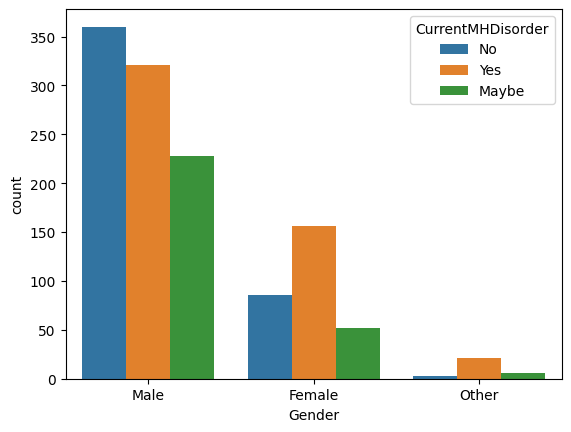

In [ ]:
#countplot of how much of each gender currently has a mental health disorder
sns.countplot(x='Gender', hue='CurrentMHDisorder', data=df)

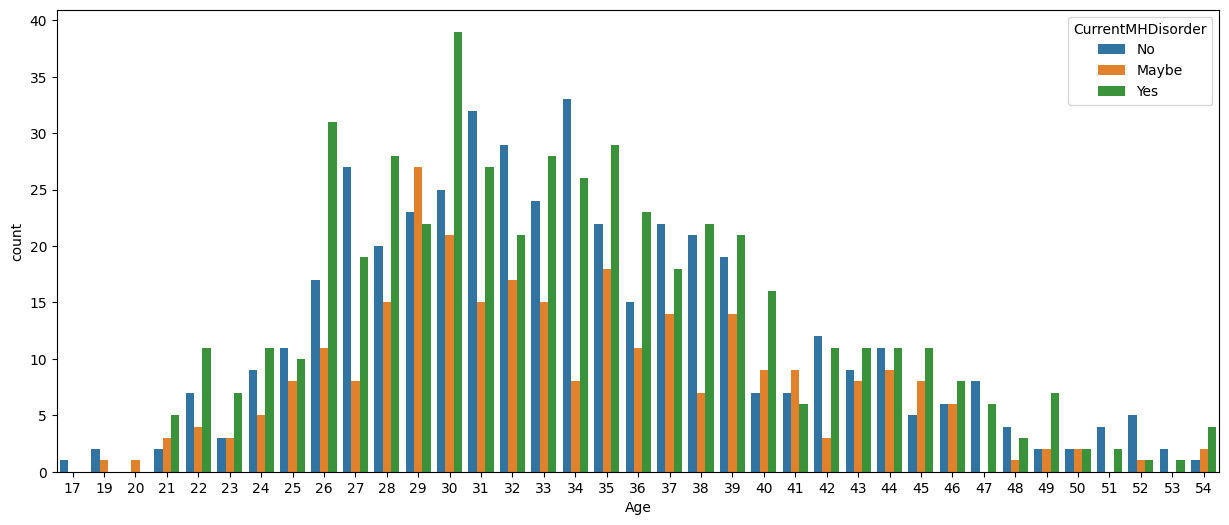

In [ ]:
#plot of Age and currentMHDisorder status - no IQR outliers
plt.figure(figsize=(15, 6))

sns.countplot(x='Age', hue='CurrentMHDisorder', data=df)

plt.show()


#histogram of yes, no, maybe over age

<Axes: xlabel='Gender', ylabel='Age'>

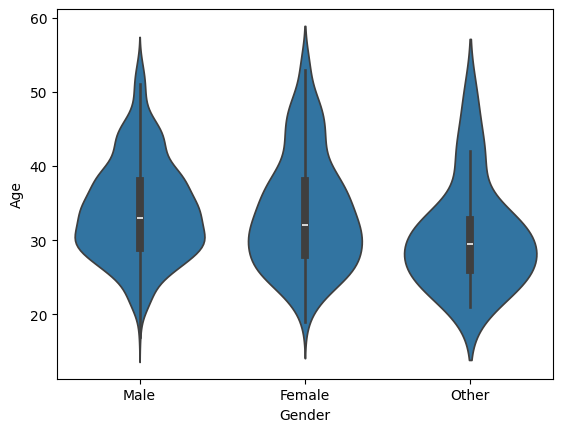

In [ ]:
#violin plot - outliers removed

sns.violinplot( x=df["Gender"], y=df["Age"], data=df )

In [ ]:
female_remote = df[df["Gender"] == "Female"][["Gender", "RemoteWork", "CurrentMHDisorder"]]
male_remote = df[df["Gender"] == "Male"][["Gender", "RemoteWork", "CurrentMHDisorder"]]
other_remote = df[df_cat["Gender"] == "Other"][["Gender", "RemoteWork", "CurrentMHDisorder"]]

female_remote.value_counts()
male_remote.value_counts()


<ipython-input-34-96b28da8c19a>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  other_remote = df[df_cat["Gender"] == "Other"][["Gender", "RemoteWork", "CurrentMHDisorder"]]


Gender  RemoteWork  CurrentMHDisorder
Male    Sometimes   No                   200
                    Yes                  173
                    Maybe                113
        Always      No                    86
                    Yes                   74
        Never       No                    74
                    Yes                   74
        Always      Maybe                 59
        Never       Maybe                 56
Name: count, dtype: int64

<Figure size 2500x1000 with 0 Axes>

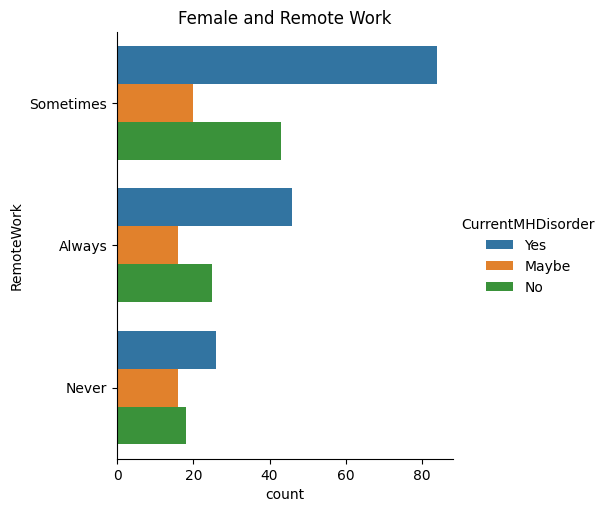

In [ ]:
#plot of target with females and their remote work situation

plt.figure(figsize=(25, 10))
sns.catplot(data=female_remote, y="RemoteWork", hue="CurrentMHDisorder", kind="count")
plt.title("Female and Remote Work")
plt.show()

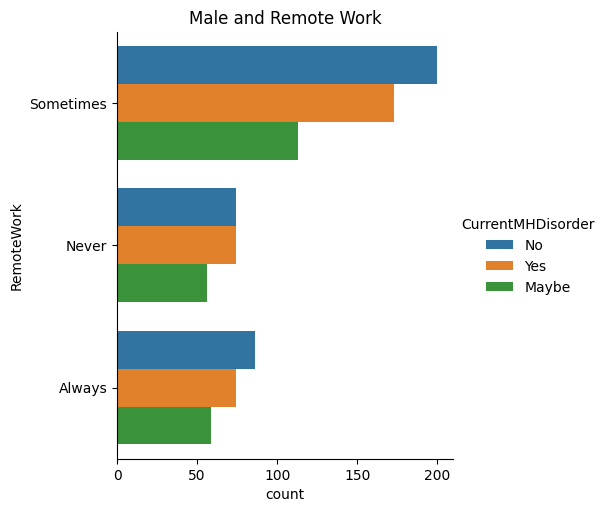

In [ ]:
#plot of target with males and their remote work situation
sns.catplot(data=male_remote, y="RemoteWork", hue="CurrentMHDisorder", kind="count")
plt.title("Male and Remote Work")
plt.show()

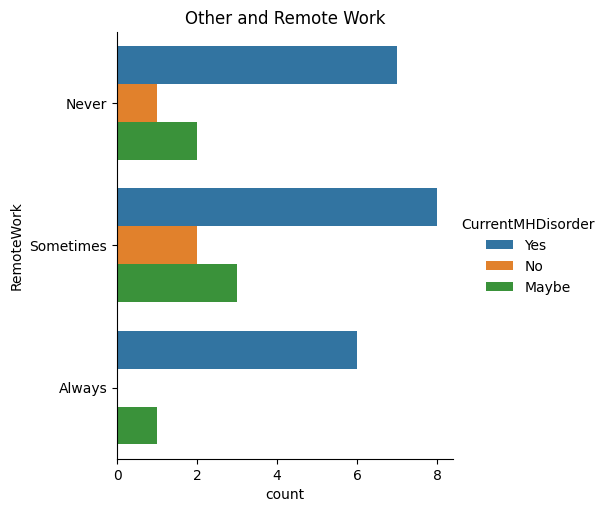

In [ ]:
#plot of target with other and their remote work situation

sns.catplot(data=other_remote, y="RemoteWork", hue="CurrentMHDisorder", kind="count")
plt.title("Other and Remote Work")
plt.show()

# FEATURE ENGINEERING - OUTLIERS REMOVED

In [ ]:
#FEATURE ENGINEERING - WITHOUT OUTLIERS

#calculate correlation coefficients to target variable

#cramers V - measure of association

def cramers_v(col1):

  crosstab = pd.crosstab(df_cat_clean["CurrentMHDisorder"], df_cat_clean[col1])


  chi_2 = chi2_contingency(crosstab)



  sum = crosstab.sum().sum()

  print((sum * (np.min(crosstab.shape) - 1)))

  v = np.sqrt(chi_2[0] / (sum * (np.min(crosstab.shape) - 1)))

  return v




for col in columns:
  print(col)
  print(cramers_v(col))



SelfEmployed
1233
0.042631395131257306
PreviousEmployers
0
nan
PrevEmployersMHBenefits
2466
0.15418935048408924
AwarePrevMHCareOptions
2466
0.12679076255722263
PrevEmployersDiscussMH
2466
0.08032311272946298
PrevEmployersMHResources
2466
0.02733209105125234
AnonymityProtected
2466
0.10469962478583893
MHDiscussNegConsequences
2466
0.16774466972519153
PHDiscussNegConsequences
2466
0.0672517464339321
WillingToDiscussMHCoworkers
2466
0.06263240869713008
WillingToDiscussMHSupervisor
2466
0.11657083771584695
PrevEmployersMHTakenSeriously
2466
0.1448945761419666
ObservedNegConsequencesMH
2466
0.11782395338056542
WillingDiscussPHInterview
2466
0.018228793540356444
WillingDiscussMHInterview
2466
0.10123975513875602
MHCareerImpact
2466
0.15126365700713454
CoworkersViewNegativelyMH
2466
0.1727804911896184
WillingShareMHFamilyFriends
2466
0.26236802098027495
ObservedBadResponseMH
2466
0.2131515063420349
FamilyHistoryMH
2466
0.303946921669178
PastMHDisorder
2466
0.562838653266211
CurrentMHDisorder


In [ ]:
#del min

n = 0.2

df_cat_filtered_clean = df_cat_clean.copy()


while True:
    # Compute Cramer's V for all columns and store in a dictionary
    cramers_values = {col: cramers_v(col) for col in df_cat_filtered_clean.columns}

    print(cramers_values)


    # Find the column with the lowest Cramer's V value
    lowest_col = min(cramers_values, key=cramers_values.get)
    lowest_value = cramers_values[lowest_col]


    print("COLUMN WITH LOWEST VALUE: ", lowest_col)
    print("LOWEST VALUE: ", lowest_value)

    # Check if the lowest value is below the threshold
    if lowest_value < n or np.isnan(lowest_value):
        # Drop the column with the lowest Cramér's V value
        df_cat_filtered_clean.drop(lowest_col, axis=1, inplace=True)
        print(f"{lowest_col} column has been dropped (Cramér's V = {lowest_value})")
    else:
        # Break the loop if all columns meet the threshold
        break

for col in df_cat_filtered_clean.columns:
  print(col)
  print(cramers_v(col))


# Collect final Cramér's V values
final_cramers_values = {col: cramers_v(col) for col in df_cat_filtered_clean.columns}

# Sort final values by Cramér's V in ascending order
sorted_cramers_values = dict(sorted(final_cramers_values.items(), key=lambda item: item[1]))

# Print sorted final Cramér's V values
print("\nFinal Cramér's V values (sorted in ascending order):")
for col, value in sorted_cramers_values.items():
    print(f"{col}: {value}")


  #find the "most meaningful predictor"

1233
0
2466
2466
2466
2466
2466
2466
2466
2466
2466
2466
2466
2466
2466
2466
2466
2466
2466
2466
2466
2466
1233
1233
2466
2466
2466
2466
2466
2466
2466
{'SelfEmployed': 0.042631395131257306, 'PreviousEmployers': nan, 'PrevEmployersMHBenefits': 0.15418935048408924, 'AwarePrevMHCareOptions': 0.12679076255722263, 'PrevEmployersDiscussMH': 0.08032311272946298, 'PrevEmployersMHResources': 0.02733209105125234, 'AnonymityProtected': 0.10469962478583893, 'MHDiscussNegConsequences': 0.16774466972519153, 'PHDiscussNegConsequences': 0.0672517464339321, 'WillingToDiscussMHCoworkers': 0.06263240869713008, 'WillingToDiscussMHSupervisor': 0.11657083771584695, 'PrevEmployersMHTakenSeriously': 0.1448945761419666, 'ObservedNegConsequencesMH': 0.11782395338056542, 'WillingDiscussPHInterview': 0.018228793540356444, 'WillingDiscussMHInterview': 0.10123975513875602, 'MHCareerImpact': 0.15126365700713454, 'CoworkersViewNegativelyMH': 0.1727804911896184, 'WillingShareMHFamilyFriends': 0.26236802098027495, 'Ob

In [ ]:
#df_cat_filtered_clean.info()

features_clean = df_cat_filtered_clean.drop("CurrentMHDisorder", axis=1)

features_clean.info()

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
data_encoded = encoder.fit_transform(features_clean)
encoded_features_clean = pd.DataFrame(data_encoded, columns=encoder.get_feature_names_out(features_clean.columns))

<class 'pandas.core.frame.DataFrame'>
Index: 1233 entries, 0 to 1431
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   WillingShareMHFamilyFriends           1233 non-null   object
 1   ObservedBadResponseMH                 1233 non-null   object
 2   FamilyHistoryMH                       1233 non-null   object
 3   PastMHDisorder                        1233 non-null   object
 4   DiagnosedMHCondition                  1233 non-null   object
 5   SoughtTreatmentMH                     1233 non-null   int64 
 6   MHTreatmentEffectiveWorkInterference  1233 non-null   object
 7   MHNoTreatmentWorkInterference         1233 non-null   object
 8   CountryLive                           1233 non-null   object
 9   CountryWork                           1233 non-null   object
 10  WorkPosition                          1233 non-null   object
dtypes: int64(1), object(10)
memory usag

In [ ]:
encoded_features_clean["Age"] = df_age_clean.reset_index(drop=True)


target_clean2 = df_cat_filtered_clean["CurrentMHDisorder"]

print(encoded_features_clean.shape)

print(target_clean2.shape)


(1233, 364)
(1233,)


# LOGISTIC REGRESSION MODEL - OUTLIERS REMOVED

In [ ]:
#logistic regression model WITHOUT OUTLIERS

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Define features (X) and target (y)
X2 = encoded_features_clean
y2 = target_clean2

# Split into training (80%) and testing (20%) datasets
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42, stratify=y2)

logreg2 = LogisticRegression()

logreg2.fit(X_train,y_train)


y_pred2 = logreg2.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred2))
print(classification_report(y_test, y_pred2))


print("Training set score: {:.3f}".format(logreg2.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg2.score(X_test, y_test)))


#note: hyperparameter tuning decreased model performance


#remove MAYBES and create another LR model

Accuracy:  0.7651821862348178
              precision    recall  f1-score   support

       Maybe       0.67      0.42      0.52        57
          No       0.85      0.79      0.82        90
         Yes       0.74      0.94      0.83       100

    accuracy                           0.77       247
   macro avg       0.75      0.72      0.72       247
weighted avg       0.76      0.77      0.75       247

Training set score: 0.799
Test set score: 0.765


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#remove maybes from target variable and remake LR model

features_clean["Age"] = df_age_clean.reset_index(drop=True)

target_clean3 = df_cat_filtered_clean["CurrentMHDisorder"]

lr_df_concat = pd.concat([features_clean, target_clean3], axis=1)

df_maybe = lr_df_concat[lr_df_concat["CurrentMHDisorder"] != "Maybe"]

df_maybe.shape

#re-encoding

features_clean3 = df_maybe.drop("CurrentMHDisorder", axis=1)

features_clean3.info()

from sklearn.preprocessing import OneHotEncoder

encoder3 = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
data_encoded3 = encoder3.fit_transform(features_clean3)
encoded_features_clean3 = pd.DataFrame(data_encoded3, columns=encoder3.get_feature_names_out(features_clean3.columns))

encoded_features_clean3["Age"] = df_age_clean.reset_index(drop=True)

target_clean3 = df_maybe["CurrentMHDisorder"]

print(encoded_features_clean3.shape)

print(target_clean3.shape)


#df_maybe.info()



# Define features (X) and target (y)
X3 = encoded_features_clean3
y3 = target_clean3

# Split into training (80%) and testing (20%) datasets
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.3, random_state=42, stratify=y3)

logreg3 = LogisticRegression()

logreg3.fit(X_train,y_train)


y_pred3 = logreg3.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred3))
print(classification_report(y_test, y_pred3))


print("Training set score: {:.3f}".format(logreg3.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg3.score(X_test, y_test)))



<class 'pandas.core.frame.DataFrame'>
Index: 947 entries, 0 to 1431
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   WillingShareMHFamilyFriends           947 non-null    object 
 1   ObservedBadResponseMH                 947 non-null    object 
 2   FamilyHistoryMH                       947 non-null    object 
 3   PastMHDisorder                        947 non-null    object 
 4   DiagnosedMHCondition                  947 non-null    object 
 5   SoughtTreatmentMH                     947 non-null    int64  
 6   MHTreatmentEffectiveWorkInterference  947 non-null    object 
 7   MHNoTreatmentWorkInterference         947 non-null    object 
 8   CountryLive                           947 non-null    object 
 9   CountryWork                           947 non-null    object 
 10  WorkPosition                          947 non-null    object 
 11  Age                    

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# DECISION TREE MODEL - OUTLIERS REMOVED

In [ ]:
#decision tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("Training set score: {:.3f}".format(clf.score(X_train, y_train)))
print("Test set score: {:.3f}".format(clf.score(X_test, y_test)))

Accuracy:  0.6639676113360324
              precision    recall  f1-score   support

       Maybe       0.42      0.30      0.35        57
          No       0.68      0.77      0.72        90
         Yes       0.74      0.78      0.76       100

    accuracy                           0.66       247
   macro avg       0.61      0.61      0.61       247
weighted avg       0.64      0.66      0.65       247

Training set score: 1.000
Test set score: 0.664


In [ ]:
#random forest
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=50)
clf = clf.fit(X_train, y_train)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("Training set score: {:.3f}".format(clf.score(X_train, y_train)))
print("Test set score: {:.3f}".format(clf.score(X_test, y_test)))


Accuracy:  0.6639676113360324
              precision    recall  f1-score   support

       Maybe       0.42      0.30      0.35        57
          No       0.68      0.77      0.72        90
         Yes       0.74      0.78      0.76       100

    accuracy                           0.66       247
   macro avg       0.61      0.61      0.61       247
weighted avg       0.64      0.66      0.65       247

Training set score: 0.999
Test set score: 0.741


In [ ]:
#what else should be looked at? which variables were the most significant?